# Final Project - Puji Rahayu

### 1. Importing libary

In [55]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.datasets import load_digits
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

%matplotlib inline
mpl.style.use(['ggplot'])

In [56]:
ds = pd.read_csv('covid_19_data.csv')

In [57]:
ds.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [58]:
#Summarizing missing values

ds.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     19705
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [59]:
#Missing values handling

ds['Province/State'].fillna('not confirmed', inplace=True)

In [60]:
#Resummarizing missing values

ds.isnull().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [61]:
#Set ObservationDate as index

ds.set_index('ObservationDate', inplace=True)

In [62]:
ds.head()

,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,,
01/22/2020,1,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
01/22/2020,2,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
01/22/2020,3,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
01/22/2020,4,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
01/22/2020,5,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [63]:
#Drop column Last Update

ds.drop(['Last Update'], axis=1, inplace=True)
ds.drop(['SNo'], axis=1, inplace=True)

In [64]:
ds.head()

,Province/State,Country/Region,Confirmed,Deaths,Recovered
ObservationDate,,,,,
01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


#### Covid case in Indonesia

In [65]:
indocase = ds[
    ds['Country/Region'] == 'Indonesia'
]

In [66]:
indocase

,Province/State,Country/Region,Confirmed,Deaths,Recovered
ObservationDate,,,,,
03/02/2020,not confirmed,Indonesia,2.0,0.0,0.0
03/03/2020,not confirmed,Indonesia,2.0,0.0,0.0
03/04/2020,not confirmed,Indonesia,2.0,0.0,0.0
03/05/2020,not confirmed,Indonesia,2.0,0.0,0.0
03/06/2020,not confirmed,Indonesia,4.0,0.0,0.0
...,...,...,...,...,...
06/18/2020,not confirmed,Indonesia,42762.0,2339.0,16798.0
06/19/2020,not confirmed,Indonesia,43803.0,2373.0,17349.0
06/20/2020,not confirmed,Indonesia,45029.0,2429.0,17883.0


#### Plotting covid case in Indonesia

In [67]:
plotcase = indocase[['Confirmed', 'Deaths', 'Recovered']]

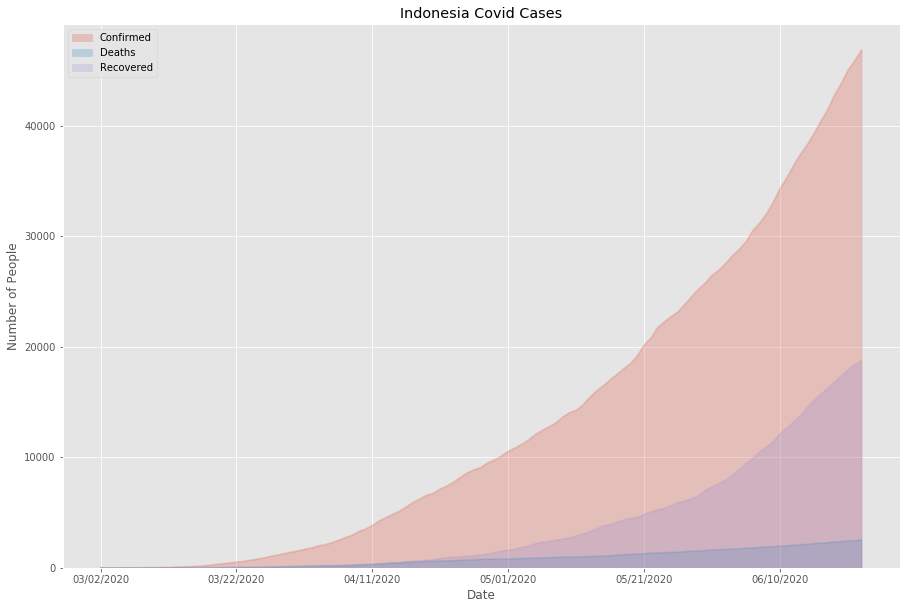

In [14]:
plotcase.plot(kind='area',
             stacked=False,
             alpha=0.25,
             figsize=(15, 10)
             )

plt.title('Indonesia Covid Cases')
plt.ylabel('Number of People')
plt.xlabel('Date')

plt.show()

### 2. Statistic

In [15]:
indocase.describe()

,Confirmed,Deaths,Recovered
count,113.000000,113.000000,113.000000
mean,13434.991150,847.867257,3815.584071
std,13589.794531,753.111552,5168.024232
min,2.000000,0.000000,0.000000
25%,1414.000000,122.000000,75.000000
50%,9096.000000,765.000000,1151.000000
75%,22750.000000,1391.000000,5642.000000
max,46845.000000,2500.000000,18735.000000


In [16]:
x = indocase['Confirmed']
y = indocase['Deaths']
z = indocase['Recovered']

#### 2.1. Mean & Mode 

In [17]:
print('Mean for Corfirmed case : ', np.mean(x))
print('Mode for Confirmed case : ', x.mode())

print('Mean for Deaths case : ', np.mean(y))
print('Mode for Deaths case : ', y.mode())

print('Mean for Recovered case : ', np.mean(z))
print('Mode for Recovered case : ', z.mode())

Mean for Corfirmed case :  13434.991150442478
Mode for Confirmed case :  0    2.0
dtype: float64
Mean for Deaths case :  847.8672566371681
Mode for Deaths case :  0    0.0
dtype: float64
Mean for Recovered case :  3815.5840707964603
Mode for Recovered case :  0    0.0
dtype: float64


#### 2.2. Standart Deviation 

In [18]:
print('Standart deviation for  Corfirmed case : ', np.std(x))
print('Standart deviation for  Deaths case : ', np.std(y))
print('Standart deviation for  Recovered case : ', np.std(z))

Standart deviation for  Corfirmed case :  13529.529070086983
Standart deviation for  Deaths case :  749.7717942421858
Standart deviation for  Recovered case :  5145.106051222883


### 3. Regression Line

#### 3.1. Plotting with Regression Line 

In [19]:
#Changing rows to array

x = np.array(indocase['Confirmed'])
y = np.array(indocase['Deaths'])
z = np.array(indocase['Recovered'])
xyz = np.array([[x, y, z]])

In [20]:
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

In [21]:
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

'Regression line: y=108.79+0.06x, r=0.99'

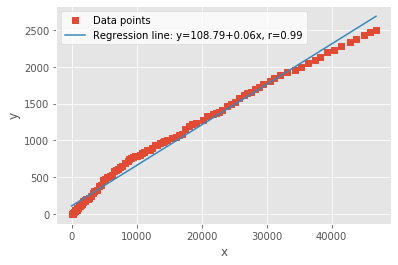

In [22]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

### 4. Linear Regression

In [23]:
x = np.array(indocase['Confirmed']).reshape(-1, 1)
y = np.array(indocase['Deaths'])

In [24]:
model = LinearRegression().fit(x,y)

In [25]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9854054240058534


In [26]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 108.78755057973774
slope: [0.05501155]


In [27]:
y_pred = model.predict(x)
model.predict([[100000]])

array([5609.94268929])

In [28]:
print("Prediction when the number of confirmed added 100000 cases, the number of death will be :", model.predict([[100000]]))

Prediction when the number of confirmed added 100000 cases, the number of death will be : [5609.94268929]


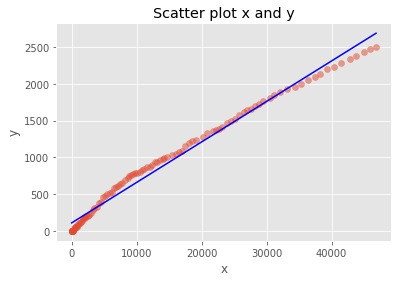

In [29]:
plt.scatter(x, y, alpha=0.5)
plt.plot(x, y_pred, color='blue')
plt.title('Scatter plot x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 5. Logistic Regression

In [30]:
x = np.array(indocase['Confirmed']).reshape(-1, 1)
y = np.array(indocase['Deaths'])

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [32]:
#Standardize your inputs by creating an instance of StandardScaler and calling .fit_transform() on it:

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [33]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [34]:
x_test = scaler.transform(x_test)

In [35]:
y_pred = model.predict(x_test)

In [36]:
model.score(x_train, y_train)

0.08888888888888889

In [37]:
model.score(x_test, y_test)

0.08695652173913043

In [38]:
confusion_matrix(y_test, y_pred)

array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

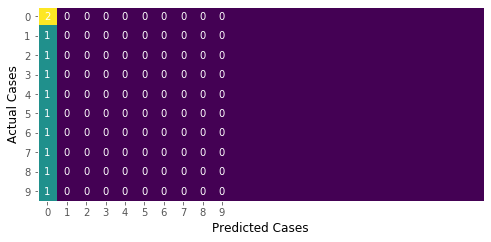

In [39]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted Cases', color='black')
ax.set_ylabel('Actual Cases', color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

### 6. Model training and evaluation with KNN 

In [49]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(x_test)

In [50]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.13043478260869565


### 7. Conclution

1. Prediction when the number of confirmed added 100000 cases, the number of death will be : 5609.94268929
2. 8% from corfirmed case are deaths